<a href="https://colab.research.google.com/github/mostofa247/Machine-Learning-Project/blob/main/exercise_02_group_114.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Name           | Student ID   | Work Percentage |
|----------------|--------------|-----------------|
| Md Mostofa Kamal | 12530879 | 50%             |
| Md Sakib Ahamed Sohag | 12517961 | 50%             |

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Social Impact Theory with Twitter Data
## Tasks
In this assignment you will do the following tasks:

1. Construct the timelines of Twitter users
2. Visualize distributions and scatter plots
3. Fit and visualize a regression model
4. Bootstrapping

### Install requirements.

The following cell contains all the necessary dependencies needed for this task. If you run the cell everything will be installed.  
* [`pandas`](https://pandas.pydata.org/docs/index.html) is a Python package for creating and working with tabular data. [Here](https://pandas.pydata.org/docs/reference/index.html) is the documentation of `pandas`.
* [`numpy`](https://numpy.org/) is a Python package for mathematical functions. [Here](https://numpy.org/doc/stable/reference/index.html) is the documentation of `numpy`.
* [`matplotlib`](https://matplotlib.org/) is a Python package for creating plots. [Here](https://matplotlib.org/stable/api/index.html) is the documentation of `matplotlib`.
* [`scikit-learn`](https://scikit-learn.org/stable/) is a Python package with different machinelearning algorithms. [Here](https://scikit-learn.org/stable/modules/classes.html) is the documentation of `sklearn`.

In [103]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install scikit-learn

### Import requirements
The cell below imports all necessary dependancies. Make sure they are installed (see cell above).

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 1 Construct the timelines of Twitter users

## 1.1 Getting a list of users
Retrieve all user informations of every user in the list from the `users.csv` file and save them in a pandas Dataframe.


In [105]:
# Your Code goes here!
df_users = pd.read_csv("users.csv")
print(df_users.head())
print(df_users.info())


          username                   id                created_at  \
0  RepConnieConway  1544718378987933703  2022-07-06T16:24:50.000Z   
1   repmayraflores  1538990997769707523  2022-06-20T21:07:08.000Z   
2  CongresswomanSC  1484252226646421505  2022-01-20T19:53:08.000Z   
3     RepMikeCarey  1457745193197780993  2021-11-08T16:21:58.000Z   
4  RepShontelBrown  1456381091598700556  2021-11-04T22:01:33.000Z   

                                       name  verified  \
0                             Connie Conway      True   
1                Congresswoman Mayra Flores      True   
2  Congresswoman Sheila Cherfilus-McCormick     False   
3                    Congressman Mike Carey      True   
4                        Rep. Shontel Brown      True   

                                   profile_image_url  \
0  https://pbs.twimg.com/profile_images/155671548...   
1  https://pbs.twimg.com/profile_images/153941811...   
2  https://pbs.twimg.com/profile_images/149180185...   
3  https://pbs.twi

From those users we are interested on those who have written at least 100 tweets and that have at least 100 followers. From the remaining set sample 500 at random. Check out pandas conditional indexing [here](https://pandas.pydata.org/pandas-docs/dev/user_guide/indexing.html#boolean-indexing). To randomly get 500 users you can use pandas [`sample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) method.

In [106]:
# Your Code goes here!

filter_user = df_users[
    (df_users["public_metrics.tweet_count"]>=100) & (df_users["public_metrics.followers_count"]>=100)
]

print(filter_user)

sampled_users = filter_user.sample(n=500, random_state=42)
print(sampled_users.head())
print("sample user: ",len(sampled_users))


            username                   id                created_at  \
1     repmayraflores  1538990997769707523  2022-06-20T21:07:08.000Z   
2    CongresswomanSC  1484252226646421505  2022-01-20T19:53:08.000Z   
3       RepMikeCarey  1457745193197780993  2021-11-08T16:21:58.000Z   
4    RepShontelBrown  1456381091598700556  2021-11-04T22:01:33.000Z   
5      Rep_Stansbury  1404519992582942724  2021-06-14T19:25:16.000Z   
..               ...                  ...                       ...   
549      SteveDaines             11651202  2007-12-30T05:52:03.000Z   
550    ChuckGrassley             10615232  2007-11-26T15:17:02.000Z   
551       MarkWarner              7429102  2007-07-12T14:03:33.000Z   
552        JimInhofe              7270292  2007-07-05T14:39:13.000Z   
553      JohnBoozman              5558312  2007-04-27T16:05:52.000Z   

                                         name  verified  \
1                  Congresswoman Mayra Flores      True   
2    Congresswoman Sheila Che

## 1.2 Loading timelines

Load the `timeline.csv` file.

In [107]:
# Your Code goes here!
df_timeline = pd.read_csv("timeline.csv")

print(df_timeline.head())
print(df_timeline.info())

               source lang                   id  \
0     Twitter Web App   en  1573010740327219200   
1     Twitter Web App   en  1572977602088017921   
2     Twitter Web App   en  1572575623083708417   
3  Twitter for iPhone   en  1572271750385209346   
4  Twitter for iPhone   en  1572242351132913664   

                                 context_annotations reply_settings  \
0  [{'domain': {'id': '10', 'name': 'Person', 'de...       everyone   
1  [{'domain': {'id': '10', 'name': 'Person', 'de...       everyone   
2  [{'domain': {'id': '10', 'name': 'Person', 'de...       everyone   
3  [{'domain': {'id': '10', 'name': 'Person', 'de...       everyone   
4  [{'domain': {'id': '10', 'name': 'Person', 'de...       everyone   

   possibly_sensitive      conversation_id  author_id  \
0               False  1573010740327219200   84119348   
1               False  1572977602088017921   84119348   
2               False  1572575623083708417   84119348   
3               False  157227175038520

## 1.3 Aggregating and arranging data
With the timeline retrieved we want to calculate some metrics from the tweets, especially the mean retweet count, which is also often refered as the social impact. For this you can use pandas [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) method. Group the data by the `author_id` and calculate the mean of the retweet count of each user.

In [108]:
# Your Code goes here!
df_social_impact = df_timeline.groupby("author_id")["public_metrics.retweet_count"].mean().reset_index()
df_social_impact.rename(columns={"public_metrics.retweet_count": "retweet"}, inplace=True)


In [109]:
# Your Code goes here!
print(df_social_impact.head())



   author_id  retweet
0   14984637  272.870
1   15324851   33.460
2   15745368  564.705
3   16256269   22.200
4   18137749   40.445


Next we want to merge the users data with the newly created mean retweet informations. For this you have to merge the users dataframe with the just created dataframe with the retweet mean of each user. Use `pandas` [`merge`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) method.    

Afterwards remove all unused columns, at the end the dataframe should contain the **author ID, name, the follower count** and the **mean retweet count**.

Attention: The user id in the timeline dataframe (and later on the retweet mean dataframe) are in column `author_id` and the user id on the user dataframe (created with `list_members`) are in column `id`. You can use the keyword arguments `left_on` and `right_on` to merge the two dataframes by the different user id columns.

In [110]:
# Your Code goes here!
df_merged = pd.merge(
    df_users,
    df_social_impact,
    left_on="id",
    right_on="author_id",
    how="inner"
)
df_merged_data = df_merged[["id", "name", "public_metrics.followers_count", "retweet"]]


In [111]:
# Your Code goes here!

print(df_merged_data.head())
print(df_merged_data.info())

                    id                               name  \
0  1382395679700439041         Congresswoman Julia Letlow   
1  1351236267707654145               Senator Alex Padilla   
2  1345787285179162624             Rep. Diana Harshbarger   
3  1345103905869455361          Congresswoman Sara Jacobs   
4  1344750588026900481  Office of Rep. Nicole Malliotakis   

   public_metrics.followers_count  retweet  
0                            4241     3.83  
1                           61812   113.04  
2                           16215   199.01  
3                           19397    40.36  
4                           14464   127.29  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              100 non-null    int64  
 1   name                            100 non-null    object 
 2   public_metr

In [112]:
df_merged_data.head()

,id,name,public_metrics.followers_count,retweet
0,1382395679700439041,Congresswoman Julia Letlow,4241,3.83
1,1351236267707654145,Senator Alex Padilla,61812,113.04
2,1345787285179162624,Rep. Diana Harshbarger,16215,199.01
3,1345103905869455361,Congresswoman Sara Jacobs,19397,40.36
4,1344750588026900481,Office of Rep. Nicole Malliotakis,14464,127.29


# 3 Visualize distributions and scatter plots

## 3.1 Distribution of the number of followers
Plot the histogram of the number of followers of each users in your dataset. Repeat this with a logarithmic `y` scale. Which one is more skewed?  

You can use pandas [`hist`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) method with the keyword argumnet `log` for logarithmic scale, or you can use matplotlibs [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) method (don't forget to first create a figure), again with the keyword argument `log` to plot the data. (use bins="xx" to make the plot look more intuitive)  
All the axes of the plot should have labels, and give the plot a meaningful title.



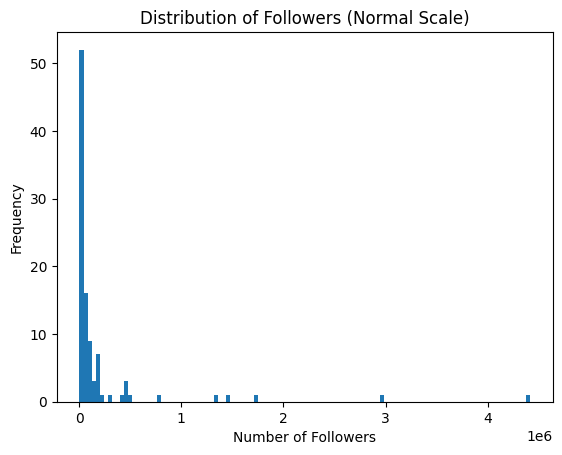

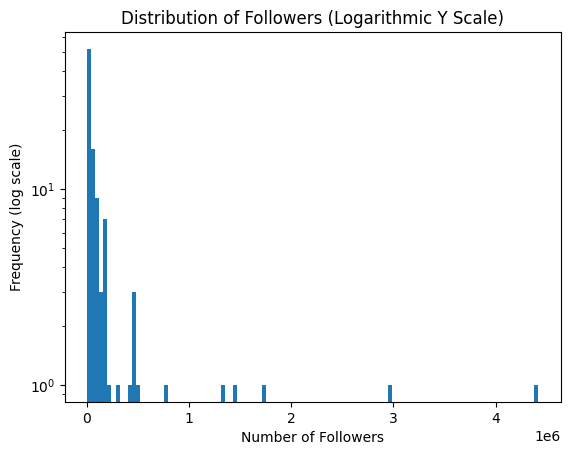

In [113]:
# Your Code goes here!
plt.figure()
plt.hist(df_merged_data["public_metrics.followers_count"], bins='auto')
plt.xlabel("Number of Followers")
plt.ylabel("Frequency")
plt.title("Distribution of Followers (Normal Scale)")
plt.show()

#log scale
plt.figure()
plt.hist(df_merged_data["public_metrics.followers_count"], bins='auto', log=True)
plt.xlabel("Number of Followers")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of Followers (Logarithmic Y Scale)")
plt.show()

## 3.2 Distribution of social impact

Repeat the above task but for the social impact of your users, also look at the logarithmic scale. Again, which one is more skewed?

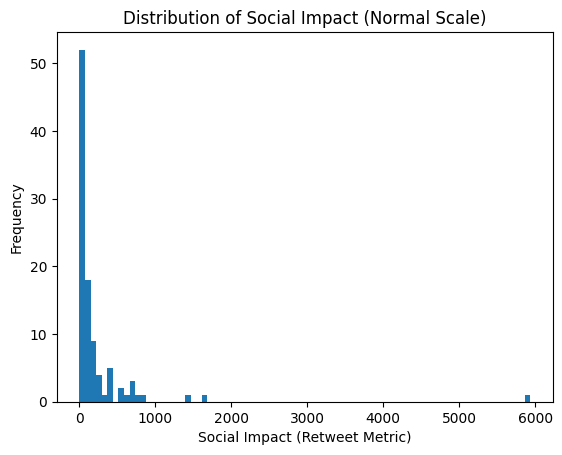

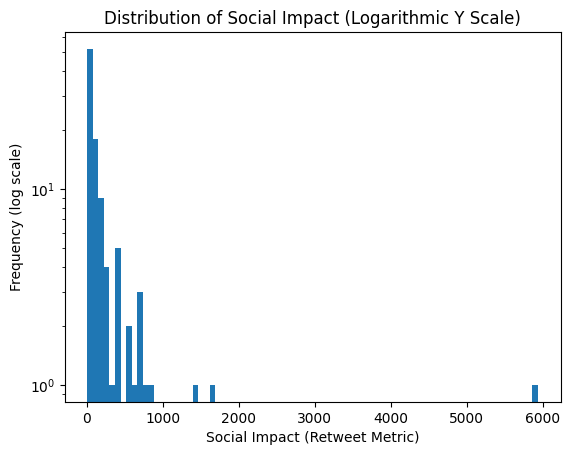

,author_id,retweet
0,14984637,272.870
1,15324851,33.460
2,15745368,564.705
3,16256269,22.200
4,18137749,40.445


In [114]:
# Your Code goes here!
plt.figure()
plt.hist(df_social_impact["retweet"], bins='auto')
plt.xlabel("Social Impact (Retweet Metric)")
plt.ylabel("Frequency")
plt.title("Distribution of Social Impact (Normal Scale)")
plt.show()

# Histogram - log scale
plt.figure()
plt.hist(df_social_impact["retweet"], bins='auto', log=True)
plt.xlabel("Social Impact (Retweet Metric)")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of Social Impact (Logarithmic Y Scale)")
plt.show()

df_social_impact.head()

## 3.3 Number of followers vs social impact
Create a scatter plot with the number of followers of each user on the x axis and the social impact of each user on the y axis. Both axis should be in logarithmic scale. Is there a relationship?  

Again you can use pandas [`scatter`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html) method with `logx` and `logy` set to true or you can use matplotlibs [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) method. Here you can use the `set_yscale` and `set_xscale` method of the axis to set them to `'log'`.  
All the axes of the plot should have labels, and give the plot a meaningful title.

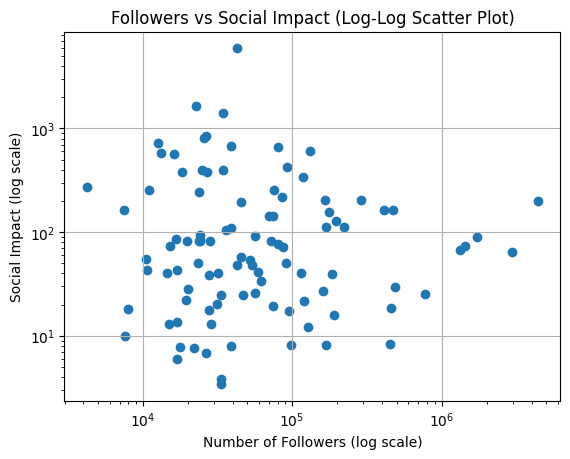

In [115]:
# Your Code goes here!
plt.figure()
plt.scatter(df_merged_data["public_metrics.followers_count"], df_social_impact["retweet"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of Followers (log scale)")
plt.ylabel("Social Impact (log scale)")
plt.title("Followers vs Social Impact (Log-Log Scatter Plot)")
plt.grid(True)
plt.show()

# 4. Fit and visualize a regression model

## 4.1 Fit a linear model

First of all make two new columns on the data frame with the social impact and the follower count. One called `SI` with the logarithm of the amount of retweets, and another called `FC` with the logarithm of the amount of followers. For this you can use numpys log function `np.log(...)`.  

Now fit a linear regression model with sklearn. For this use the class [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to create a linear regression instance and then call the `fit` method. `SI` is used as the dependent variable (target) and `FC` as the independent variable (features).  
Tip: When fitting the model, do not access the columns as a single column, becaus this will return a Pandas Series, but as a list of columns to make sure you are supplying a DataFrame. df[['column']]


Print the model intercept and coefficient. For this you can use the models attributes `coef_` and `intercept_`. What do these values mean?

In [116]:
# Your Code goes here!
df_merged_data.loc[:, "SI"] = np.log(df_merged_data["retweet"])
df_merged_data.loc[:, "FC"] = np.log(df_merged_data["public_metrics.followers_count"])


model = LinearRegression()
X = df_merged_data[["FC"]]
y = df_merged_data["SI"]
model.fit(X, y)


/tmp/ipython-input-3891979510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_data.loc[:, "SI"] = np.log(df_merged_data["retweet"])
/tmp/ipython-input-3891979510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_data.loc[:, "FC"] = np.log(df_merged_data["public_metrics.followers_count"])


LinearRegression()

In [117]:
# Your Code goes here!

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


Intercept: -1.3409845397442641
Coefficient: 0.511527652248146


## 4.2 Plot the results
Now plot the same scatter plot as in 3.3 additional add a line plot which shows the regression line of the model. For this use the intercept and the coefficient (slope). Does the line fit the data as you expected?  

It is easier to use matplotlib here to add the line plot to the scatter plot. For the line plot you can use matplotlibs [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) method. For the x values you can use numpy's [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace) method to evenly space x values in a certain range. The y values can be calculated with the intercept and the slope as follows:  
$
\begin{align}
    y = slope \cdot x + intercept
\end{align}
$

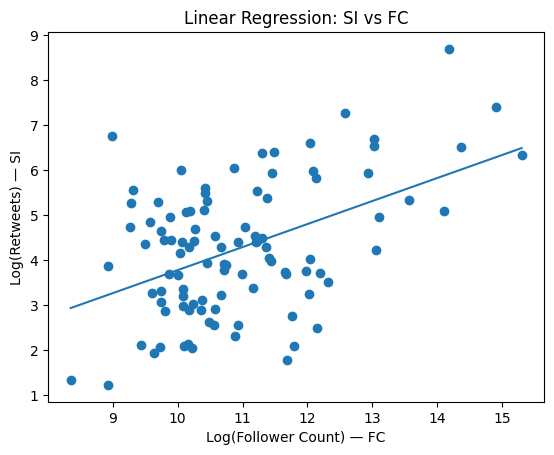

In [118]:
# Your Code goes here!
plt.scatter(df_merged_data["FC"], df_merged_data["SI"])

x_value = np.linspace(df_merged_data["FC"].min(), df_merged_data["FC"].max(), 100)

slope = model.coef_[0]
intercept = model.intercept_

y_value = slope * x_value + intercept

plt.plot(x_value, y_value)

plt.xlabel("Log(Follower Count) — FC")
plt.ylabel("Log(Retweets) — SI")
plt.title("Linear Regression: SI vs FC")
plt.show()

## 4.3 Calculate quality of the fit
Calculate the residuals of the model and save them in a vector. This can be done with following formula:
$
\begin{align}
residual = y_{true} - y_{pred}
\end{align}
$
where $y_{true}$ are the true values of the dependent variable (in our case `SI`) and $y_{pred}$ are the predicted values with the model. To get the predicted values of the model you can use the [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) method of the model.  

Afterwards calculate the variance of the residuals and the variance of the social impact variable. For this you can use numpy's [`var`](https://numpy.org/doc/stable/reference/generated/numpy.var.html) function. Is the variance of the residuals lower than the variance of the dependent variable? By how much in proportion?

In [119]:
# Your Code goes here!
y_true = df_merged_data["SI"]
y_pred = model.predict(df_merged_data[["FC"]])

residuals = y_true - y_pred

var_residuals = np.var(residuals)
var_SI = np.var(y_true)

proportion = var_residuals / var_SI

var_residuals, var_SI, proportion


(1.66563642096538, 2.135053463926882, 0.7801380382774444)

## 4.4 Distribution of residuals
Plot the histogram of residuals. Do they look normally distributted?  

Again you can use matplotlib as before to plot the histogram.

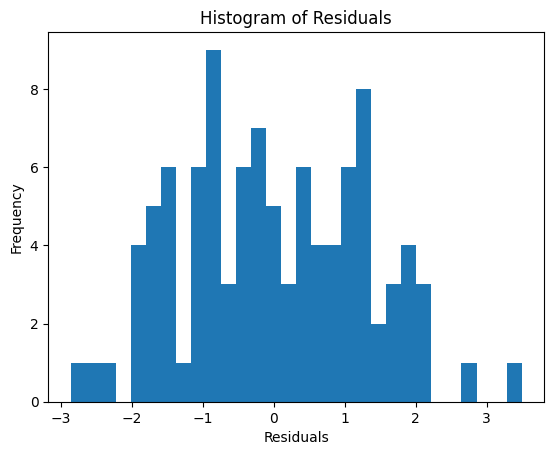

In [120]:
# Your Code goes here!
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# 5. Bootstrapping

## 5.1 One sample
For bootsrapping we first look at creating one sample. For this use the dataframe which includse the follower and social impact from before and sample random rows with replacement. This again can be done with pandas [`sample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) method and the keyword argument `replace` set to `True`.  

Fit a new linear regression model with this new dataset. What is the value of the coefficient and the intercept now? Describe shortly what the bootstrap method is doing and why the values are the same or different.

In [121]:
# Your Code goes here!
boot_df = df_merged_data.sample(len(df_merged_data), replace=True)

boot_model = LinearRegression()
boot_model.fit(boot_df[["FC"]], boot_df["SI"])

print(boot_model.intercept_)
print(boot_model.coef_[0])

-1.3024417062434415
0.5205508392937753


## 5.2 Many bootstrap samples
Now repeat this 10000 times, save the resulting coefficient in a vector.

In [122]:
# Your Code goes here!

coefficients = []

for _ in range(10000):
    boot_df = df_merged_data.sample(len(df_merged_data), replace=True)
    boot_model = LinearRegression()
    boot_model.fit(boot_df[["FC"]], boot_df["SI"])
    coefficients.append(boot_model.coef_[0])

coefficients = np.array(coefficients)

coefficients.mean(), coefficients.std()


(np.float64(0.5071120572585066), np.float64(0.10532699640995231))

## 5.3 Bootstrap histogram

Plot a histogram of the values resulting from the permutations and add a vertical line on the value of the coefficient of the original model (from task 4.1). For adding a vertical line to the histogram in matplotlib you can use the [`axvline`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html) method.  

 How far is the line from the center of the histogram? What is the meaning of this?

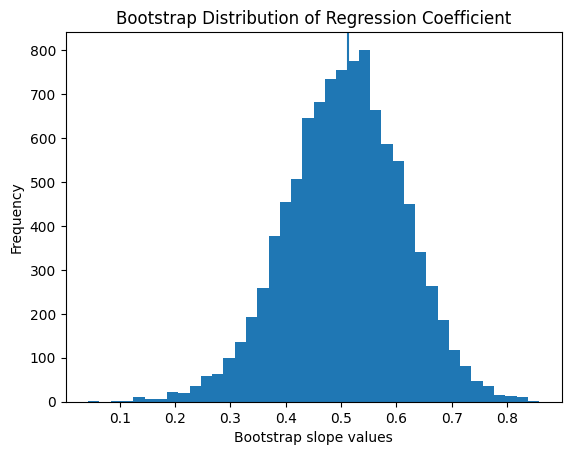

In [123]:
# Your Code goes here!
plt.hist(coefficients, bins=40)

orig_coef = model.coef_[0]
plt.axvline(orig_coef)
plt.xlabel("Bootstrap slope values")
plt.ylabel("Frequency")
plt.title("Bootstrap Distribution of Regression Coefficient")
plt.show()

# Questions
* Do you find any relationship between social impact and the amount of followers?
* How sure are you that it is larger than zero? How sure are you that it is lower than 1?
* Is the value of the relationship within the ranges predicted by Social Impact Theory?
* Under that relationship, if I have 1000 followers, how many more followers do I need to double my social impact?

1. yes, we find relationship between social impact and the amount of followers. Most social-media datasets show a positive log log slope.

2. If almost all bootstrap coefficients are > 0,
then you are very sure that the true value is positive.

3. If all or nearly all are < 1, then you are very sure the slope is below 1.

4. if your slope is:
positive, less than 1.
Your estimated α is fully consistent with Social Impact Theory.

5.

<!-- -->
